In [1]:
# Importing Modules
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Reading the DataFrame
seeds_df = pd.read_csv(
    "https://raw.githubusercontent.com/vihar/unsupervised-learning-with-python/master/seeds-less-rows.csv")

In [3]:
seeds_df.columns

Index(['area', 'perimeter', 'compactness', 'length', 'width',
       'asymmetry_coefficient', 'groove_length', 'grain_variety'],
      dtype='object')

In [4]:
seeds_df.head()

,area,perimeter,compactness,length,width,asymmetry_coefficient,groove_length,grain_variety
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
1,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,Kama wheat
2,14.03,14.16,0.8796,5.438,3.201,1.717,5.001,Kama wheat
3,13.99,13.83,0.9183,5.119,3.383,5.234,4.781,Kama wheat
4,14.11,14.26,0.8722,5.520,3.168,2.688,5.219,Kama wheat


In [5]:
seeds_df["grain_variety"].value_counts()

Canadian wheat    14
Rosa wheat        14
Kama wheat        14
Name: grain_variety, dtype: int64

In [5]:
seeds_df.columns

Index(['area', 'perimeter', 'compactness', 'length', 'width',
       'asymmetry_coefficient', 'groove_length', 'grain_variety'],
      dtype='object')

In [6]:
# Remove the grain species from the DataFrame, save for later
varieties = list(seeds_df.pop('grain_variety'))

In [7]:
varieties

['Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat']

In [8]:
# Extract the measurements as a NumPy array
samples = seeds_df.values

In [9]:
samples

array([[14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
       [14.03  , 14.16  ,  0.8796,  5.438 ,  3.201 ,  1.717 ,  5.001 ],
       [13.99  , 13.83  ,  0.9183,  5.119 ,  3.383 ,  5.234 ,  4.781 ],
       [14.11  , 14.26  ,  0.8722,  5.52  ,  3.168 ,  2.688 ,  5.219 ],
       [13.02  , 13.76  ,  0.8641,  5.395 ,  3.026 ,  3.373 ,  4.825 ],
       [15.49  , 14.94  ,  0.8724,  5.757 ,  3.371 ,  3.412 ,  5.228 ],
       [16.2   , 15.27  ,  0.8734,  5.826 ,  3.464 ,  2.823 ,  5.527 ],
       [13.5   , 13.85  ,  0.8852,  5.351 ,  3.158 ,  2.249 ,  5.176 ],
       [15.36  , 14.76  ,  0.8861,  5.701 ,  3.393 ,  1.367 ,  5.132 ],
       [15.78  , 14.91  ,  0.8923,  5.674 ,  3.434 ,  5.593 ,  5.136 ],
       [14.46  , 14.35  ,  0.8818,  5.388 ,  3.377 ,  2.802 ,  5.044 ],
       [11.23  , 12.63  ,  0.884 ,  4.902 ,  2.879 ,  2.269 ,  4.703 ],
       [14.34  , 14.37  ,  0.8726,  5.63  ,  3.19  ,  1.313 ,  5

In [10]:
"""
Perform hierarchical clustering on samples using the
linkage() function with the method='complete' keyword argument.
Assign the result to mergings.
"""

"\nPerform hierarchical clustering on samples using the\nlinkage() function with the method='complete' keyword argument.\nAssign the result to mergings.\n"

In [11]:
mergings = linkage(samples, method='complete')

In [12]:
mergings

array([[33.        , 36.        ,  0.27162909,  2.        ],
       [21.        , 26.        ,  0.31365739,  2.        ],
       [18.        , 43.        ,  0.32846589,  3.        ],
       [38.        , 41.        ,  0.34657328,  2.        ],
       [19.        , 22.        ,  0.37233454,  2.        ],
       [15.        , 27.        ,  0.38916958,  2.        ],
       [ 4.        , 11.        ,  0.48519909,  2.        ],
       [ 2.        , 13.        ,  0.60220511,  2.        ],
       [23.        , 25.        ,  0.64447995,  2.        ],
       [ 0.        ,  9.        ,  0.66671658,  2.        ],
       [32.        , 37.        ,  0.68359363,  2.        ],
       [39.        , 42.        ,  0.75541297,  3.        ],
       [12.        , 29.        ,  0.76129577,  2.        ],
       [30.        , 34.        ,  0.79066703,  2.        ],
       [24.        , 47.        ,  0.89015184,  3.        ],
       [ 1.        ,  6.        ,  0.96077742,  2.        ],
       [31.        , 45.

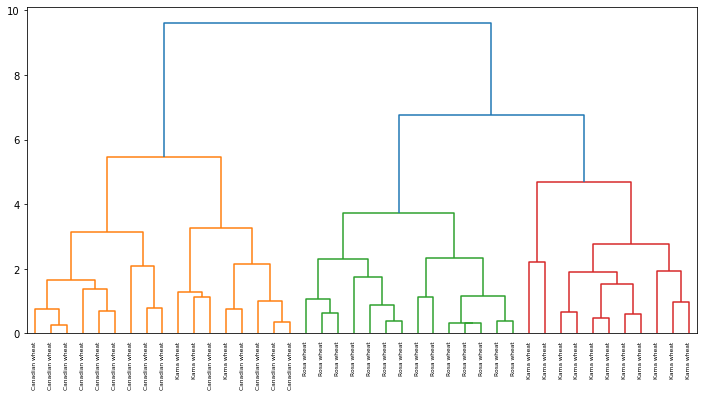

In [13]:
"""
Plot a dendrogram using the dendrogram() function on mergings,
specifying the keyword arguments labels=varieties, leaf_rotation=90,
and leaf_font_size=6.
"""
plt.figure(figsize=(12, 6))
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()